In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
zipcodes_geo = gpd.read_file('../data/zipcodes.geojson')
zipcodes_geo.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.012, -87.0214 36...."


In [4]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
bus_stops.head()

,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004
3,17TH AVE S & DOROTHY PL SB,BELMONT,"(36.137623, -86.795609)",36.137623,-86.795609
4,COCKRILL ST & 14TH AVE N,ST. CECILIA - CUMBERLAND,"(36.175944, -86.804242)",36.175944,-86.804242


In [5]:
zipcodes_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                             crs = zipcodes_geo.crs,
                             geometry = gpd.points_from_xy(bus_stops.lng, bus_stops.lat))

In [7]:
zip_codes = 'zip'

In [8]:
join_zip = gpd.sjoin(
    bus_geo,
    zipcodes_geo[[zip_codes, "geometry"]],
    how="left",
    predicate="within"
)

In [9]:
counts_zip = (
    join_zip.groupby(zip_codes)
          .size()
          .rename("bus_stop_count_zip")
          .reset_index()
)

counts_zip

,zip,bus_stop_count_zip
0,37013,103
1,37027,9
2,37072,7
3,37076,50
4,37115,106
5,37138,32
6,37189,5
7,37201,36
8,37203,237
9,37204,90


In [10]:
zip_counts = zipcodes_geo.merge(counts_zip, on=zip_codes, how="left")
zip_counts["bus_stop_count_zip"] = zip_counts["bus_stop_count_zip"].fillna(0).astype(int)

''

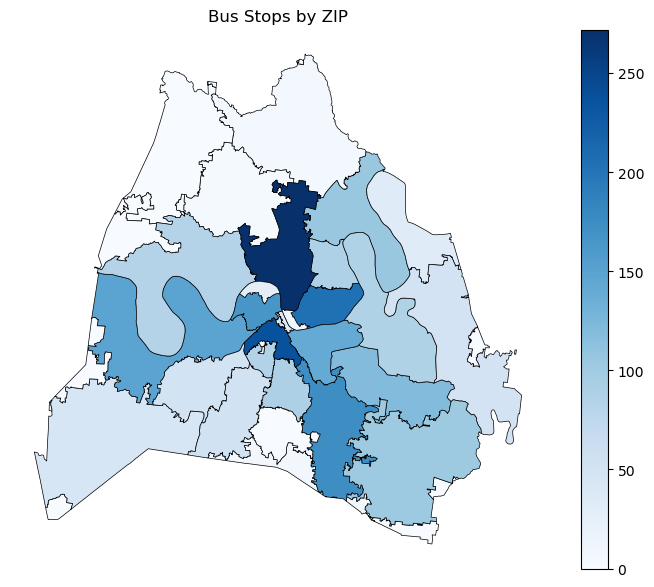

In [16]:
bus_stops_zipcodes = zip_counts.plot(
    column="bus_stop_count_zip",
    cmap='Blues',
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    figsize=(9, 7)
)

plt.title("Bus Stops by ZIP")
plt.axis("off")

plt.savefig("../maps/bus_stops_zipcodes", dpi=300, bbox_inches='tight')
;